In [1]:
import argparse
import json
import os

In [30]:
from dipy.align.reslice import reslice
import nibabel as nib
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter
import SimpleITK as sitk

In [3]:
from matplotlib import pyplot as plt

In [16]:
input_directory = "../../data/IBSR_nifti_stripped/"
subject = "IBSR_01"
input_images_suffix = "_ana_strip.nii.gz"

input_file = input_directory + subject + '/' + subject + input_images_suffix

zooms = [1., 1., 1.]

In [38]:
img = nib.load(input_file)
data = img.get_fdata()
affine = img.affine
zoom = img.header.get_zooms()[:3]
data, affine = reslice(data, affine, zoom, zooms, 1)
data = np.squeeze(data)
data = np.pad(data, [(0, 256 - len_) for len_ in data.shape], "constant")

data_sub = data - gaussian_filter(data, sigma=1)
img = sitk.GetImageFromArray(np.copy(data_sub))
img = sitk.AdaptiveHistogramEqualization(img)
data_clahe = sitk.GetArrayFromImage(img)[:, :, :, None]
data = np.concatenate((data_clahe, data[:, :, :, None]), 3)
data = (data - np.mean(data, (0, 1, 2))) / np.std(data, (0, 1, 2))
assert data.ndim == 4, data.ndim
assert np.allclose(np.mean(data, (0, 1, 2)), 0.), np.mean(data, (0, 1, 2))
assert np.allclose(np.std(data, (0, 1, 2)), 1.), np.std(data, (0, 1, 2))
data = np.float32(data)

(256, 256, 256, 2)


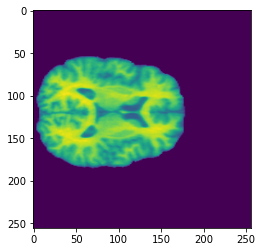

In [42]:
print(data.shape)
plt.imshow(data[:,:,130,1])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 5 dimension(s)

In [35]:
data.shape

(256, 256, 256, 2)

In [36]:
assert data.ndim == 4, data.ndim